In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments = pd.read_csv(r'C:\Users\Muatif\Desktop\Projects\Youtube Text Data Analysis\UScomments.csv', error_bad_lines = False)
comments.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [3]:
from textblob import TextBlob

In [4]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [5]:
%%time
polarity = []
for i in comments['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

Wall time: 4min 34s


In [6]:
comments['polarity'] = polarity

In [7]:
comments.head(20)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   
15  XpVt6Z1Gjjo                       He happy cause he in a movie     0   
16  XpVt6Z1Gjjo  Ayyyyoooo Logang what up .  This was a hard vl...     1   
17  XpVt6Z1Gjjo  Bro y didnt u give merch to johannes he is ur ...     0   
18  XpVt6Z1Gjjo  It's been fun watching you grow. I'm at 42 day...     3   
19  XpVt6Z1Gjjo             Made a lot of people hate youtube - GJ     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000  
15       0  0.800000  
16       0 -0.291667  
17       0  0.000000  
18       0  0.250000  
19       0 -0.800000

In [8]:
comments_positive = comments[comments['polarity'] == 1]

In [9]:
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
total_comments =(' '.join(comments_positive['comment_text']))
len(total_comments)

846560

Wall time: 3.83 s


(-0.5, 999.5, 499.5, -0.5)

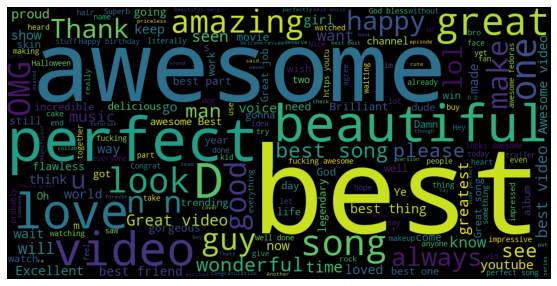

In [12]:
%%time
wordcloud = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(total_comments)
plt.figure(figsize = (15, 5))
plt.imshow(wordcloud)
plt.axis('off')

In [13]:
comments_negative = comments[comments['polarity'] == -1]
comments_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [14]:
total_comments = (' '.join(comments_negative['comment_text']))
len(total_comments)

190787

Wall time: 2.99 s


(-0.5, 999.5, 499.5, -0.5)

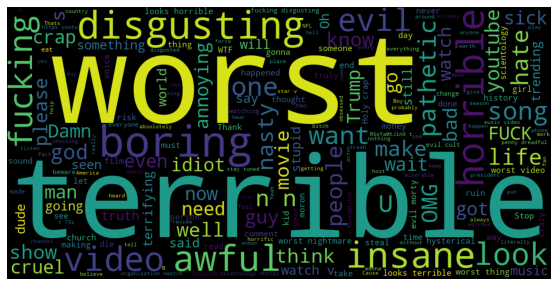

In [15]:
%%time
wordcloud_neg = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(total_comments)
plt.figure(figsize = (15, 5))
plt.imshow(wordcloud_neg)
plt.axis('off')

### Analyzing tags 

In [16]:
videos = pd.read_csv(r'C:\Users\Muatif\Desktop\Projects\Youtube Text Data Analysis\USvideos.csv', error_bad_lines = False)
videos.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [17]:
tags_incomplete =(' '.join(videos['tags']))

In [18]:
videos['tags'][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [19]:
import re

In [20]:
tags = re.sub('[^a-zA-Z]',' ', tags_incomplete)

In [21]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [22]:
tags = re.sub(' +', ' ', tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

Wall time: 6.3 s


(-0.5, 999.5, 499.5, -0.5)

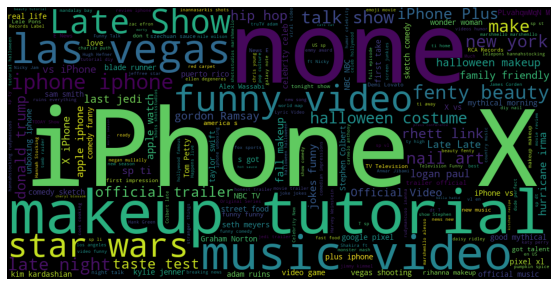

In [23]:
%%time
tags_wordcloud = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(tags)
plt.figure(figsize = (15, 5))
plt.imshow(tags_wordcloud)
plt.axis('off')


### Analyzing the likes, dislikes,  views and corelation between them 

Text(0.5, 1.0, 'Regression plot for likes vs views')

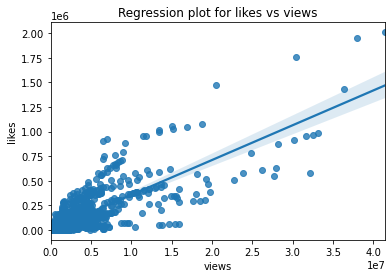

In [24]:
# plot between likes and views

sns.regplot(data = videos, x = 'views', y = 'likes')
plt.title("Regression plot for likes vs views")

Text(0.5, 1.0, 'Regression plot for dislikes vs views')

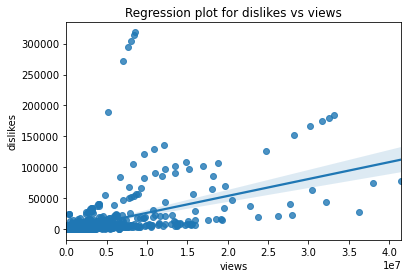

In [25]:
# plot between dislikes and views

sns.regplot(data = videos, x ='views', y = 'dislikes')
plt.title("Regression plot for dislikes vs views")

<AxesSubplot:>

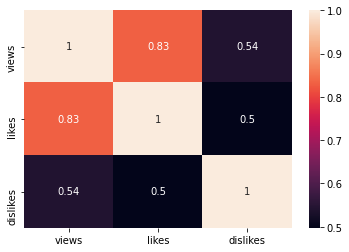

In [26]:
# creating a heatmap to find corelation

videos_corr = videos[['views', 'likes', 'dislikes']]
sns.heatmap(videos_corr.corr(), annot = True)

### Analyzing the emojis in the comments

In [27]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [28]:
!pip install emoji

  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170280 sha256=408ff01a41e6f9d71d300b810768acca61264091dba45f05dba9d170bd34f775
  Stored in directory: c:\users\muatif\appdata\local\pip\cache\wheels\7d\09\45\1ad33b3ac1e05d07355a3c81fe56c89837774fdb6665574765
Successfully built emoji


In [29]:
# check for na values if any
comments['comment_text'].isna().sum()

25

In [30]:
# dropping the na values as not required
comments['comment_text'].dropna(inplace = True)

In [31]:
# double check for na values
comments['comment_text'].isna().sum()

25

In [32]:
len(comments['comment_text'])

691400

In [33]:
# search for a random emoji 
comments['comment_text'][4]

'trending 😉'

In [34]:
# each emoji has a unicode character
import emoji
emoji_comment = 'trending 😉'
[c for c in emoji_comment if c in emoji.UNICODE_EMOJI]

[]

In [39]:
emoji.UNICODE_EMOJI

{'en': {'🥇': ':1st_place_medal:',
  '🥈': ':2nd_place_medal:',
  '🥉': ':3rd_place_medal:',
  '🆎': ':AB_button_(blood_type):',
  '🏧': ':ATM_sign:',
  '🅰️': ':A_button_(blood_type):',
  '🅰': ':A_button_(blood_type):',
  '🇦🇫': ':Afghanistan:',
  '🇦🇱': ':Albania:',
  '🇩🇿': ':Algeria:',
  '🇦🇸': ':American_Samoa:',
  '🇦🇩': ':Andorra:',
  '🇦🇴': ':Angola:',
  '🇦🇮': ':Anguilla:',
  '🇦🇶': ':Antarctica:',
  '🇦🇬': ':Antigua_&_Barbuda:',
  '♒': ':Aquarius:',
  '🇦🇷': ':Argentina:',
  '♈': ':Aries:',
  '🇦🇲': ':Armenia:',
  '🇦🇼': ':Aruba:',
  '🇦🇨': ':Ascension_Island:',
  '🇦🇺': ':Australia:',
  '🇦🇹': ':Austria:',
  '🇦🇿': ':Azerbaijan:',
  '🔙': ':BACK_arrow:',
  '🅱️': ':B_button_(blood_type):',
  '🅱': ':B_button_(blood_type):',
  '🇧🇸': ':Bahamas:',
  '🇧🇭': ':Bahrain:',
  '🇧🇩': ':Bangladesh:',
  '🇧🇧': ':Barbados:',
  '🇧🇾': ':Belarus:',
  '🇧🇪': ':Belgium:',
  '🇧🇿': ':Belize:',
  '🇧🇯': ':Benin:',
  '🇧🇲': ':Bermuda:',
  '🇧🇹': ':Bhutan:',
  '🇧🇴': ':Bolivia:',
  '🇧🇦': ':Bosnia_&_Herzegovina:',
  '🇧🇼': ':Botsw

In [36]:
str = []
for i in comments['comment_text']:
    list = [c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str = str + ele

TypeError: 'float' object is not iterable

In [ ]:
print(str)

In [ ]:
len(str)

In [ ]:
# checking for unique emojis
len(set(str))

In [ ]:
emoji_dict = {i:str.count(i) for i in set(str)}
emoji_dict

In [ ]:
# sorting the emoji dictionary
emoji_dict = {k:v for k, v in sorted(emoji_dict.items(), key = lambda item:item[1])}
emoji_dict

In [ ]:
keys = [*emoji_dict.keys()]
values = [*emoji_dict.values()]

In [ ]:
keys[0]

In [ ]:
emoji_df = pd.DataFrame({'characters': keys[-20:], 'frequency': values[-20:]})
emoji_df

In [ ]:
!pip install plotly

In [ ]:
# plotting the emojis
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace = go.Bar(x = emoji_df['characters'],
       y = emoji_df['frequency'])
iplot([trace])